### ADTA 5120 Final Project Random Forest
Marissa McKee

This project is based on the data set called ERIMdata.xlsx that includes about 3,000 households in two midwestern cities in the United States. The data contain demographic information such as household incomes, number of household members, education levels of the heads of households as well as information on the purchases of several retail products such as frozen dinners and yogurt. The data were collected between 1985 and 1988 by a marketing research firm, AC Nielsen. 


Your assignment is first to propose a business analytics plan based on the CRISP-DM framework and identify and complete the appropriate tasks for each of the six CRISP-DM phases. The project deliverables include a final written report and an oral presentation that should follow the outline shown below. 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import ERIMDataClean.csv
file = 'ERIMDataClean.csv'
df = pd.read_csv(file, sep = ',')
df.head()

,HH_ID,ResType,ResStatus,HHInc,HHNbr,MWrkHrs,MEdu,FWrkHrs,FEdu,FBirth,...,ResStatus2,MUndergrad,MGrad,FUndergrad,FGrad,Married,BuyYog,BuyDin,FAge,MAge
0,1100032,3,1,11,2,40,8,40,9,1938,...,0,0,0,1,0,1,1,0,50,53
1,1100107,1,2,3,3,0,0,40,7,1942,...,1,0,0,0,0,1,0,1,46,46
2,1100131,3,1,9,4,40,9,40,8,1949,...,0,1,0,0,0,1,1,1,39,39
3,1100172,1,2,2,1,0,0,0,9,1921,...,1,0,0,1,0,1,1,0,67,67
4,1100180,3,1,8,4,40,9,38,8,1946,...,0,1,0,0,0,1,1,0,42,51


In [3]:
# View columns
df.columns

Index(['HH_ID', 'ResType', 'ResStatus', 'HHInc', 'HHNbr', 'MWrkHrs', 'MEdu',
       'FWrkHrs', 'FEdu', 'FBirth', 'F_Rel', 'MBirth', 'M_Rel', 'Cable',
       'Cats', 'Dogs', 'YogExp', 'DinExp', 'HHIn1', 'HHIn2', 'HHIn3', 'HHIn4',
       'HHIn5', 'HHIn6', 'HHIn7', 'HHIn8', 'HHIn9', 'HHIn10', 'HHIn11',
       'HHIn12', 'HHIn13', 'ResType1', 'ResType2', 'ResType3', 'ResType4',
       'ResType5', 'ResStatus1', 'ResStatus2', 'MUndergrad', 'MGrad',
       'FUndergrad', 'FGrad', 'Married', 'BuyYog', 'BuyDin', 'FAge', 'MAge'],
      dtype='object')

In [4]:
# Establish features
features = ['HHNbr', 'MWrkHrs', 'FWrkHrs', 'Cable',
       'Cats', 'Dogs', 'DinExp', 'HHIn1', 'HHIn2', 'HHIn3', 'HHIn4',
       'HHIn5', 'HHIn6', 'HHIn7', 'HHIn8', 'HHIn9', 'HHIn10', 'HHIn11',
       'HHIn12', 'HHIn13', 'ResType1', 'ResType2', 'ResType3', 'ResType4',
       'ResType5', 'ResStatus1', 'ResStatus2', 'MUndergrad', 'MGrad',
       'FUndergrad', 'FGrad', 'Married', 'FAge', 'MAge']

In [5]:
# Set X and y values
X=df[['HHNbr', 'MWrkHrs', 'FWrkHrs', 'Cable',
       'Cats', 'Dogs', 'DinExp', 'HHIn1', 'HHIn2', 'HHIn3', 'HHIn4',
       'HHIn5', 'HHIn6', 'HHIn7', 'HHIn8', 'HHIn9', 'HHIn10', 'HHIn11',
       'HHIn12', 'HHIn13', 'ResType1', 'ResType2', 'ResType3', 'ResType4',
       'ResType5', 'ResStatus1', 'ResStatus2', 'MUndergrad', 'MGrad',
       'FUndergrad', 'FGrad', 'Married', 'FAge', 'MAge']]  # Features
y=df['BuyYog']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) 

In [6]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [7]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8095238095238095


In [8]:
# Predict the outcome of a household buying yogurt by setting the values of the features below: 
#     'HHNbr', 'MWrkHrs', 'FWrkHrs', 'Cable',
#     'Cats', 'Dogs', 'DinExp', 'HHIn1', 'HHIn2', 'HHIn3', 'HHIn4',
#     'HHIn5', 'HHIn6', 'HHIn7', 'HHIn8', 'HHIn9', 'HHIn10', 'HHIn11',
#     'HHIn12', 'HHIn13', 'ResType1', 'ResType2', 'ResType3', 'ResType4',
#     'ResType5', 'ResStatus1', 'ResStatus2', 'MUndergrad', 'MGrad',
#     'FUndergrad', 'FGrad', 'Married', 'FAge', 'MAge'

# Outcome prediction 
#     1 = buy yogurt 
#     0 = did not buy yogurt

clf.predict([[3, 40, 40, 1, 
              1, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 
              0, 1, 1, 0, 0, 0, 
              0, 1, 0, 1, 0, 
              1, 0, 1, 50, 50]])

array([1], dtype=int64)

In [9]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
# Feature importance to predicting the dependent variable
feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

MAge          0.159355
FAge          0.155771
DinExp        0.113414
FWrkHrs       0.080390
MWrkHrs       0.066645
HHNbr         0.058123
Dogs          0.047181
Cats          0.032915
Cable         0.031685
HHIn3         0.019850
HHIn4         0.017542
HHIn5         0.016277
FUndergrad    0.015713
HHIn6         0.014980
MUndergrad    0.012405
HHIn7         0.012375
ResStatus2    0.011965
ResStatus1    0.011886
MGrad         0.011883
FGrad         0.011543
HHIn8         0.011461
ResType3      0.011334
HHIn2         0.010620
Married       0.010526
HHIn9         0.007549
HHIn10        0.007443
ResType1      0.007164
HHIn1         0.006738
HHIn11        0.005810
ResType4      0.005558
ResType5      0.003985
ResType2      0.003978
HHIn12        0.003414
HHIn13        0.002522
dtype: float64

No handles with labels found to put in legend.


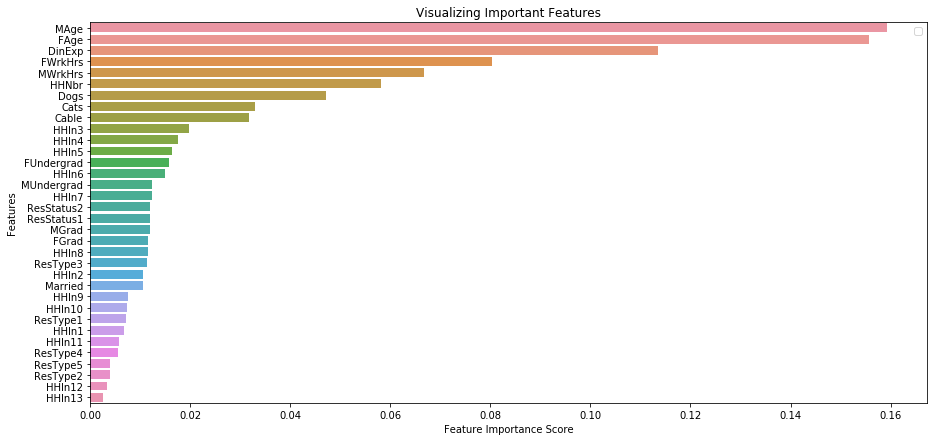

In [11]:
# Creating a bar plot
plt.figure(figsize=(15,7))
sns.barplot(x=feature_imp, y=feature_imp.index)


# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [12]:
# Split dataset into features and labels
X=df[['MAge','FAge','DinExp','FWrkHrs','MWrkHrs',
        'HHNbr','Dogs','Cats','Cable','HHIn3',
         'HHIn5','HHIn4','FUndergrad','HHIn7',
         'MUndergrad','ResType3','ResStatus1','Married']] 
y=df['BuyYog']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5) 

In [13]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

In [14]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8145363408521303


In [15]:
# Predict the outcome of a household buying yogurt by setting the values of the features below: 
#     'MAge','FAge','DinExp','FWrkHrs','MWrkHrs',
#     'HHNbr','Dogs','Cats','Cable','HHIn3',
#     'HHIn5','HHIn4','FUndergrad','HHIn7',
#     'MUndergrad','ResType3','ResStatus1','Married'

# Outcome prediction 
#     1 = buy yogurt 
#     0 = did not buy yogurt

clf.predict([[45, 45, 0, 40, 40, 
              1, 0, 0, 0, 0, 
              0, 1, 1, 0,
              1, 1, 1, 1]])

array([1], dtype=int64)